# Ford GoBike System 2019


## Introduction
Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.[3] Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose 

## task
 - wrangle ford go bike data of 2019 which is avaliable here https://www.fordgobike.com/system-data 
 - Explore the data and document the findings in a report

## Data 
the data contains 15 columns which is:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- bike share for all trip
- rental access method 

## import important libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.patches as mpatches


%matplotlib inline

## Gathering Data

In [2]:
#collecting names of data files in list
data_name=['201901-fordgobike-tripdata.csv','201902-fordgobike-tripdata.csv',
           '201903-fordgobike-tripdata.csv','201904-fordgobike-tripdata.csv','201905-baywheels-tripdata.csv',
           '201906-baywheels-tripdata.csv','201907-baywheels-tripdata.csv','201908-baywheels-tripdata.csv',
           '201909-baywheels-tripdata.csv','201910-baywheels-tripdata.csv','201911-baywheels-tripdata.csv',
           '201912-baywheels-tripdata.csv']

In [3]:
# in decamber data , rows from no.122422 to the end of data set was corrupted and  software can not read it
# reading the first 122421 rows 
data_12=pd.read_csv(data_name[11],nrows=122421)
data_12.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,66600,2019-12-31 14:28:50.2860,2020-01-01 08:58:51.2500,364,China Basin St at 3rd St,37.772000,-122.389970,349,Howard St at Mary St,37.781010,-122.405666,12085,Customer,No,NaN
1,36526,2019-12-31 21:52:47.7620,2020-01-01 08:01:33.9320,38,The Embarcadero at Pier 38,37.782926,-122.387921,410,Illinois St at Cesar Chavez St,37.750200,-122.386567,9477,Customer,No,NaN
2,8164,2019-12-31 23:50:04.8770,2020-01-01 02:06:09.4140,14,Clay St at Battery St,37.795001,-122.399970,6,The Embarcadero at Sansome St,37.804770,-122.403234,10420,Customer,No,NaN
3,8163,2019-12-31 23:49:21.4000,2020-01-01 02:05:24.6670,14,Clay St at Battery St,37.795001,-122.399970,6,The Embarcadero at Sansome St,37.804770,-122.403234,2065,Customer,No,NaN
4,6847,2019-12-31 22:51:05.6850,2020-01-01 00:45:13.4860,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,363,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,10219,Customer,No,NaN


In [4]:
#read rest of data 
df=pd.read_csv(data_name[0])
for i in range(1,len(data_name)-1):
    df=pd.concat([df,pd.read_csv(data_name[i],low_memory=False)],ignore_index=True,sort=True)
df

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.6130,Subscriber
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.1730,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.8860,Subscriber
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.5300,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.9240,Customer
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.3180,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.7190,Customer
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.0650,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.5410,Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356876,320825,NaN,3699,NaN,37.776148,-122.392519,NaN,2019-11-09 17:24:43,app,NaN,37.805850,-122.470256,NaN,2019-11-09 16:23:04,Subscriber
2356877,561068,NaN,4099,NaN,37.827707,-122.481640,NaN,2019-11-23 12:00:55,app,NaN,37.806367,-122.435708,NaN,2019-11-23 10:52:35,Subscriber
2356878,713264,NaN,3938,NaN,37.805155,-122.448127,NaN,2019-11-23 11:57:55,app,NaN,37.806381,-122.435732,NaN,2019-11-23 10:52:16,Subscriber
2356879,283550,NaN,1457,NaN,37.774648,-122.414078,NaN,2019-11-01 13:02:01,app,NaN,37.806662,-122.413747,NaN,2019-11-01 12:37:43,Subscriber


In [5]:
# concat december data with rest of data
df=pd.concat([df,data_12],ignore_index=True,sort=True)

In [6]:
#display the first five rows in the whole dataset
df.head(5)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.6130,Subscriber
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.1730,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.8860,Subscriber
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.5300,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.9240,Customer
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.3180,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.7190,Customer
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.0650,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.5410,Customer


In [7]:
# save data in one file 
df.to_csv('ford_gobike_system_2019',index=False)

## Assessing Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479302 entries, 0 to 2479301
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(7)
memory usage: 283.7+ MB


In [9]:
# find missing data
df.isnull().sum()

bike_id                          0
bike_share_for_all_trip      93157
duration_sec                     0
end_station_id               61555
end_station_latitude             0
end_station_longitude            0
end_station_name             61005
end_time                         0
rental_access_method       2386145
start_station_id             59715
start_station_latitude           0
start_station_longitude          0
start_station_name           59118
start_time                       0
user_type                        0
dtype: int64

In [10]:
df.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude
count,2.479302e+06,2.479302e+06,2.417747e+06,2.479302e+06,2.479302e+06,2.419587e+06,2.479302e+06,2.479302e+06
mean,2.266704e+04,8.076054e+02,1.424983e+02,3.776665e+01,-1.223483e+02,1.462806e+02,3.776748e+01,-1.223522e+02
std,1.005552e+05,1.895622e+03,1.213026e+02,2.359540e-01,7.025787e-01,1.221827e+02,1.331425e-01,3.086721e-01
min,4.000000e+00,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02
25%,1.921000e+03,3.590000e+02,4.200000e+01,3.777008e+01,-1.224117e+02,4.700000e+01,3.777003e+01,-1.224130e+02
50%,4.329000e+03,5.710000e+02,1.010000e+02,3.778076e+01,-1.223981e+02,1.040000e+02,3.778053e+01,-1.223984e+02
75%,9.605000e+03,8.870000e+02,2.390000e+02,3.779625e+01,-1.222948e+02,2.420000e+02,3.779539e+01,-1.222935e+02
max,9.999370e+05,8.623000e+04,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00


In [11]:
#find duplicated rows
df.duplicated().sum()

0

### Quality issue
- `wrong datatype`(bike_share_for_all_trip,end_station_id,end_time,start_station_id,start_time and user_type columns)
- `missing data` in bike_share_for_all_trip ,end_station_id,end_station_name,rental_access_method,start_station_id and start_station_name columns
- `30 incorrect values `in duration_sec column
- convert duration time from seconds to minutes and rename it duration_minuit
- bike_share_for_all_trip and rental_access method columns are not important so it is better to remove them
- inaccurate values in start_time and end time_time columns( start_time takes a place after end_time or they interchanges) 
- negative values in duration_minute column

## Cleaning data

#### Define 
- convert datatype of bike_share_for_all_trip and user_type from string to category. 
- convert data type of end_station_id and start_station_id from float to int.
- convert data type of start_time and end_time from string to datetime.

#### Code

In [12]:
#convert datatype of bike_share_for_all_trip and user_type from string to category. 
df['bike_share_for_all_trip']=df['bike_share_for_all_trip'].astype('category')
df['user_type']=df['user_type'].astype('category')

In [13]:
# convert data type of end_station_id and start_station_id from float to int.
# fill null with -1 
df['end_station_id']=df['end_station_id'].fillna(-1).astype('int')
df['start_station_id']=df['start_station_id'].fillna(-1).astype('int')

In [14]:
#convert data type of start_time and end_time from string to datetime.
df['start_time']=pd.to_datetime(df['start_time'],format='%Y-%m-%d %H:%M:%S.%f')
df['end_time']=pd.to_datetime(df['end_time'],format='%Y-%m-%d %H:%M:%S.%f')

#### test

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479302 entries, 0 to 2479301
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             int32
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
rental_access_method       object
start_station_id           int32
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
dtypes: category(2), datetime64[ns](2), float64(4), int32(2), int64(2), object(3)
memory usage: 231.7+ MB


In [16]:
#calculate duration from start time to end time
df['diff_time']=df['end_time'] - df['start_time']
df['diff_time']=df['diff_time']/np.timedelta64(1,'s')

In [17]:
# get number of incorrect values in duration_sec column 
print(len(df.query('duration_sec<diff_time-1 or duration_sec>diff_time+1')))
df.query('duration_sec<diff_time-1 or duration_sec>diff_time+1')

30


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,diff_time
567839,6576,No,78403,21,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),2019-03-10 12:48:21.535,NaN,44,37.781074,-122.411738,Civic Center/UN Plaza BART Station (Market St ...,2019-03-09 14:01:37.602,Customer,82003.933
567898,5223,No,38028,4,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-03-10 12:40:39.498,NaN,31,37.783813,-122.434559,Raymond Kimbell Playground,2019-03-10 01:06:50.626,Subscriber,41628.872
568012,6327,No,65865,371,37.802746,-122.413579,Lombard St at Columbus Ave,2019-03-10 12:20:04.356,NaN,323,37.798014,-122.405950,Broadway at Kearny,2019-03-09 17:02:18.785,Customer,69465.571
568505,6545,No,38707,398,37.796471,-122.416858,Leavenworth St at Broadway,2019-03-10 10:40:55.916,NaN,124,37.760447,-122.410807,19th St at Florida St,2019-03-09 22:55:48.837,Customer,42307.079
568509,4043,Yes,39505,310,37.335885,-121.885660,San Fernando St at 4th St,2019-03-10 10:39:41.682,NaN,341,37.336188,-121.889277,Fountain Alley at S 2nd St,2019-03-09 22:41:16.199,Subscriber,43105.483
568630,4779,No,70009,267,37.861804,-122.253569,Derby St at College Ave,2019-03-10 10:12:52.592,NaN,167,37.848152,-122.252160,College Ave at Harwood Ave,2019-03-09 13:46:02.607,Customer,73609.985
568701,3147,No,41986,73,37.771793,-122.433708,Pierce St at Haight St,2019-03-10 09:46:03.719,NaN,98,37.765052,-122.421866,Valencia St at 16th St,2019-03-09 21:06:17.455,Customer,45586.264
568943,6283,No,847,125,37.759200,-122.409851,20th St at Bryant St,2019-03-10 03:11:59.178,NaN,369,37.787349,-122.416651,Hyde St at Post St,2019-03-10 01:57:52.064,Subscriber,4447.114
568946,5903,Yes,6288,324,37.788300,-122.408531,Union Square (Powell St at Post St),2019-03-10 03:09:26.873,NaN,368,37.785434,-122.419622,Myrtle St at Polk St,2019-03-10 00:24:38.275,Subscriber,9888.598
568949,4837,No,908,352,37.726943,-122.406600,Goettingen St at Bacon St,2019-03-10 03:07:12.641,NaN,129,37.758862,-122.412544,Harrison St at 20th St,2019-03-10 01:52:04.007,Subscriber,4508.634


#### Define 
30 incorrect values in duration_sec columns

#### Code 

In [18]:
df['duration_sec']=df['diff_time']
df.drop(columns='diff_time',inplace=True,axis=1)

In [19]:
#convert duaration from second to minute
df['duration_sec']=df['duration_sec']/60.0
#rename duration_sec
df.rename(columns={'duration_sec':'duration_minute'},inplace=True)

In [20]:
# check inaccurate values in duration column
part_df=df[df.duration_minute<0][['duration_minute','start_time','end_time']]
part_df

,duration_minute,start_time,end_time
2342111,-31.327200,2019-11-03 01:59:09.303,2019-11-03 01:27:49.671
2342126,-41.311467,2019-11-03 01:59:37.722,2019-11-03 01:18:19.034
2342134,-49.274000,2019-11-03 01:59:13.155,2019-11-03 01:09:56.715
2342136,-44.075800,2019-11-03 01:50:02.261,2019-11-03 01:05:57.713
2342137,-43.881933,2019-11-03 01:49:43.895,2019-11-03 01:05:50.979
2342139,-51.509117,2019-11-03 01:56:25.083,2019-11-03 01:04:54.536
2342140,-49.508183,2019-11-03 01:53:38.578,2019-11-03 01:04:08.087
2342141,-49.932333,2019-11-03 01:53:14.617,2019-11-03 01:03:18.677
2342142,-49.132000,2019-11-03 01:52:25.884,2019-11-03 01:03:17.964
2342143,-53.095083,2019-11-03 01:55:36.152,2019-11-03 01:02:30.447


#### Define
negative value in duration_minute column because start_time takes a place after end_time.  

#### Code

In [21]:

for i in part_df.index:
    #swap start time and end time columns for negative duration
    df['start_time'][i],df['end_time'][i]=df['end_time'][i],df['start_time'][i]
    
    #make duration values positive.
    df['duration_minute'][i]=np.abs(df['duration_minute'][i])

    

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Test

In [22]:
#should return nothing
df[df.duration_minute<0]

,bike_id,bike_share_for_all_trip,duration_minute,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type


#### Define
- missing data in bike_share_for_all_trip ,end_station_id,end_station_name,rental_access_method,start_station_id and start_station_name columns
- bike_share_for_all_trip and rental_access method columns are not important so it is better to remove them

#### Code

In [23]:
#drop bike_share_for_all_trip and rental_access_method columns
df.drop(columns=['rental_access_method','bike_share_for_all_trip'],axis=1,inplace=True)

In [24]:
# remove null values
df.dropna(inplace=True)

#### Test

In [25]:
df.isnull().sum()

bike_id                    0
duration_minute            0
end_station_id             0
end_station_latitude       0
end_station_longitude      0
end_station_name           0
end_time                   0
start_station_id           0
start_station_latitude     0
start_station_longitude    0
start_station_name         0
start_time                 0
user_type                  0
dtype: int64

In [26]:
# save clean_data
df_clean=df.copy()
#df.to_csv('ford_gobike_system_clean.csv')

In [27]:
df.to_csv('ford_gobike_system_2019_clean.csv',index=False)


## data exploration
befor visualization ,many columns need to create to help making good visualization.

In [28]:
# create new column with day name
df['day_of_week'] = df['start_time'].dt.day_name()

In [29]:
# create new column with month
df['month']=df['start_time'].dt.month

# create new column with hour
df['hour']=df['start_time'].dt.hour

# create new column with day of month
df['day_of_month']=df['start_time'].dt.day

In [59]:
# dictionary to pass to replace method to determine which day is weekday and which day is weekend
day_convert={'Saturday':'Weekend','Sunday':'Weekend','Monday':'Weekday','Tuesday':'Weekday','Wednesday':'Weekday','Friday':'Weekday','Thursday':'Weekday'}
#create column to indicate weekdays and weekends
df['state_of_day']=df['day_of_week'].replace(day_convert)

In [40]:
df.head()

,bike_id,duration_minute,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,day_of_week,month,hour,day_of_month,state_of_day,displacement
0,4861,1347.087517,196,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.864,229,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.613,Subscriber,Thursday,1,17,31,weekday,5305.0
1,5506,1098.338117,134,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.173,4,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.886,Subscriber,Thursday,1,20,31,weekday,3860.0
2,2717,1043.893433,157,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.530,245,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.924,Customer,Thursday,1,18,31,weekday,3287.0
3,4557,744.676650,53,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.318,85,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.719,Customer,Thursday,1,19,31,weekday,1000.0
4,2100,1011.825400,28,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.065,16,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.541,Customer,Thursday,1,14,31,weekday,953.0


### what is the structure of the dataset
these dataset records information about users of bay wheels service which is id of bike they have used ,where and when they have took and leave it ,how long they have used it and record the coordinates of them.
<br>
 most of these information are numbers so it easy to investigate.

### What is/are the main feature(s) of interest in your dataset?
I am interested in figure out what features are best for improving this service  

## Univariate Exploration


## what are the most days users use ford bike??

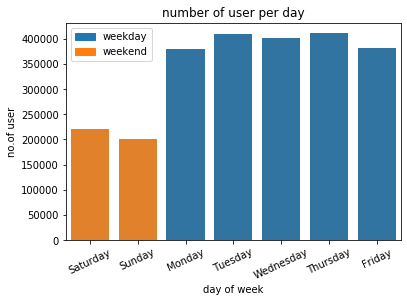

In [41]:
#When are most trips taken in term
weekend_color=sb.color_palette()[1]
weekday_color=sb.color_palette()[0]
color=[weekend_color,weekend_color,weekday_color,weekday_color,
       weekday_color,weekday_color,weekday_color]
order=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
sb.countplot(data=df,x='day_of_week',palette=color,order=order)
plt.xticks(rotation=25)
plt.title('number of user per day')
plt.ylabel('no.of user')
plt.xlabel('day of week')

# create alegend
red_patch = mpatches.Patch(color=weekday_color, label='weekday')
pathch=mpatches.Patch(color=weekend_color,label='weekend')
plt.legend(handles=[red_patch,pathch])
plt.show()

users -whatever they are customer or subscriber -use bay wheels service during whole week ,the frequently use it in weekday expect saturday and sunday which is weekend ,so we can say that they use it for work like going to school or going to work 

### most of users are customer or subscriber??

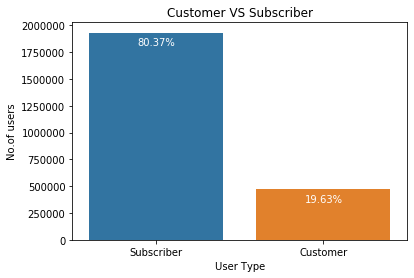

In [42]:
user_count=df['user_type'].value_counts()
total=df.shape[0]
sb.countplot(df.user_type,order=user_count.index)
plt.ylabel('No.of users')
plt.title('Customer VS Subscriber')
plt.xlabel('User Type')
index=0

#make a text in top of bars
for i in user_count.keys():
    plt.text(index,user_count[i]-120000,'{:0.2f}%'.format(user_count[i]/total*100),ha='center',color='w')
    index+=1

it is clear that most users are subscriber and this is expected as people use this service frequently ,they prefer to be subscriebr. 

### what the average duration in minuit ??

the minimum value of duration : 1.00 minutes
the mean of duration : 13.42 minutes
the maximum value of duration : 1437.17 minutes


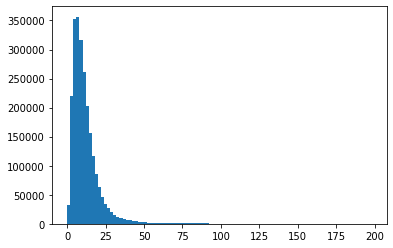

In [43]:
print('the minimum value of duration : {:0.2f}'.format(df.duration_minute.min()),'minutes')
print('the mean of duration : ',end='')
print('{:0.2f}'.format(df.duration_minute.mean()),'minutes')
print('the maximum value of duration : {:0.2f}'.format(df.duration_minute.max()),'minutes')

#create a histgram 
plt.hist(df.duration_minute,bins=np.arange(0,200,2));

the mean duration in minute is 13 minutes with minimum value 1 minutes and maximum value is 1437 minutes(24 hour) ,this doesn't make sense because nobody can ride a bike for whole day ,in my openion the user forget to record the end of his trip,but most of user don't exceed 50 minutes and rare users use it more than an hour

### the most frequent months bay wheel service is used?

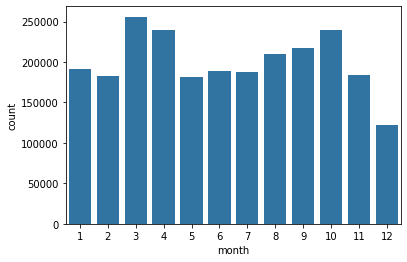

In [44]:
# number of users per month
base_color=sb.color_palette()[0]
sb.countplot(df.month,color=base_color)

they frequently use this service in march ,april,august,september and october 
<br>
they use it in december a little bit
<br>
the rest of months ,they used it normally

### what is the most frequently hour users used bay bike?

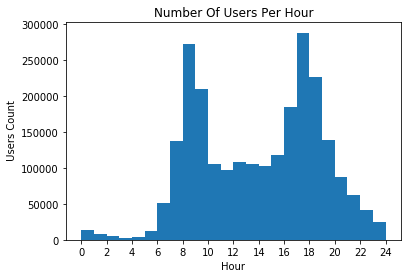

In [45]:
#array of hours to make bins
bins=np.arange(25)
#ticks to put in x axis to show hours
ticks=np.arange(0,25,2)
plt.hist(df.hour,bins=bins)
plt.xticks(ticks);
plt.title('Number Of Users Per Hour')
plt.xlabel('Hour')
plt.ylabel(" Users Count")
plt.show();

 It rarely used during night espacially after 12PM 
 <br>
 it frequently used from 7AM to 10AM and from 5PM to 8Pm and from 10Am to 5PM it used normally 

## Bivariate Exploration

### which day ford bikes are used frequently ?

Text(0, 0.5, 'Avg.duration(minute)')

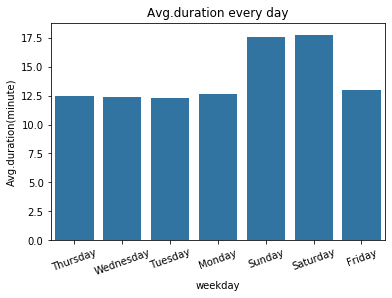

In [49]:
# create abar plot to show the average time along the week
sb.barplot(data=df,x='day_of_week',y='duration_minute',color=base_color,errwidth=0)
#rotate the tick name in x axis
plt.xticks(rotation=20)
plt.title('Avg.duration every day')
plt.xlabel('weekday')
plt.ylabel('Avg.duration(minute)')

Also ford bike are used a little bit during weekend but user use it for a long period on weekend

### what is the relation between state of day and duration?

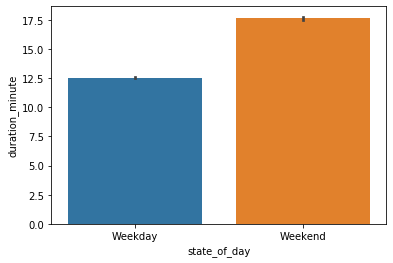

In [60]:
# barplor to get the mean of duration in weekend and weekday
sb.barplot(data=df,x='state_of_day',y='duration_minute',errwidth=0)
plt.title('mean duration on weekends and weekdays')
#empty label 
plt.xlabel('')
plt.ylabel('mean of duration (minute)')
plt.show();

also people use bikes frequently during weekdays more than that of weekends ,the mean duration of weekends is bigger than that of weekdays,may because during weekday people seeks to go to their distinations queckly,on the other hand on weekend the have free time so no need to be fast.

### who used ford bike for along time

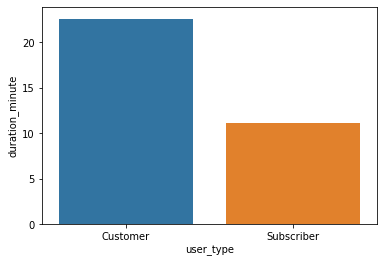

In [63]:
sb.barplot(data=df,x='user_type',y='duration_minute',errwidth=0)
plt.title('mean time for user')
plt.xlabel('User type')
plt.ylabel('mean of duration time(minute)')
plt.show();

it's clear that customer used ford bike longer than subscriber 

### Customer VS Subscriber in duration time

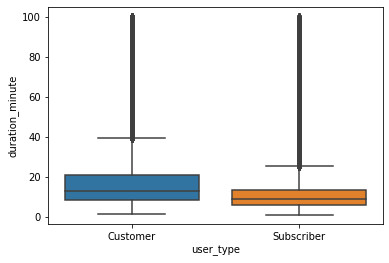

In [65]:
#box plot to data which duration is less than 100 minute
sb.boxplot(data=df[df.duration_minute<100],x='user_type',y='duration_minute')


as most duration time range from zero to 50 minute i make boxplot visualization in this range to see the relation between subscriber and customer and it seems that the customers concour the subscribers in duration minute as minimum and maximum duration for customers is bigger than that of subscriber and first and third quatile too.

### is subscriber use bikes more than customer in both weekday and weekend?

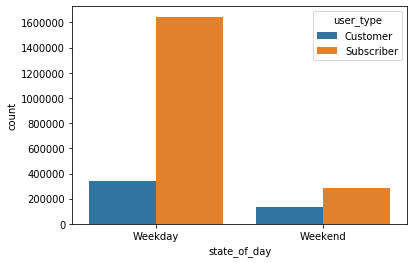

In [66]:
sb.countplot(data=df,x='state_of_day',hue='user_type')

through this plot ,subscriber used bikes more than customer on both weekday and weekend,but in weekend they approximatly the same.

### is the relation between no.of customer and subscriber changes over months?

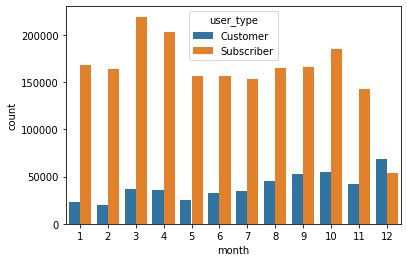

In [67]:
sb.countplot(data=df,x='month',hue='user_type')

No the have the same relation over months ,the both decrease in summer holiday months and increase in other months. 

## Multivariate Exploraation

### the relation between mean of subscriber and customer during the week?

Text(0, 0.5, 'avg.duration')

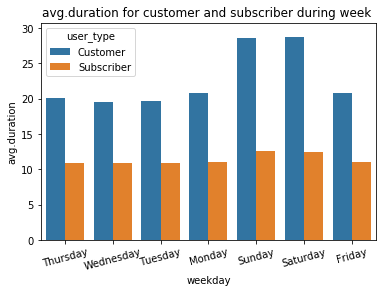

In [71]:
#barplot to indicate the relation between mean of duration to both subscriber and customer through the week.
sb.barplot(data=df,x='day_of_week',y='duration_minute',hue='user_type',errwidth=0)
plt.xticks(rotation=15)
plt.title('avg.duration for customer and subscriber during week ')
plt.xlabel('weekday')
plt.ylabel('avg.duration')

it seems that no change or abnormal situation.

### is the distribution of duration in each weekend and weekday over months?

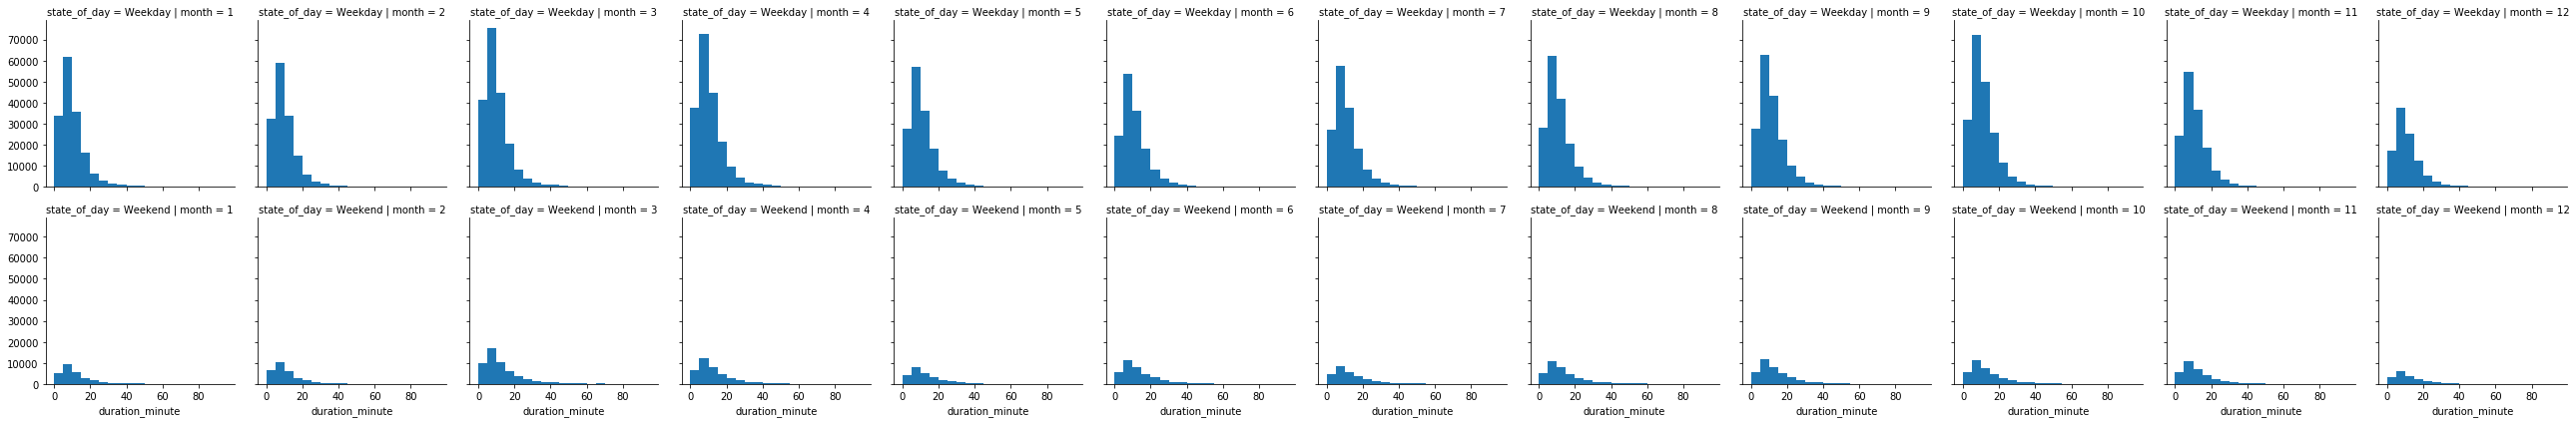

In [73]:
g=sb.FacetGrid(data=df,col='month',row='state_of_day')
g.map(plt.hist,'duration_minute',bins=np.arange(0,100,5))

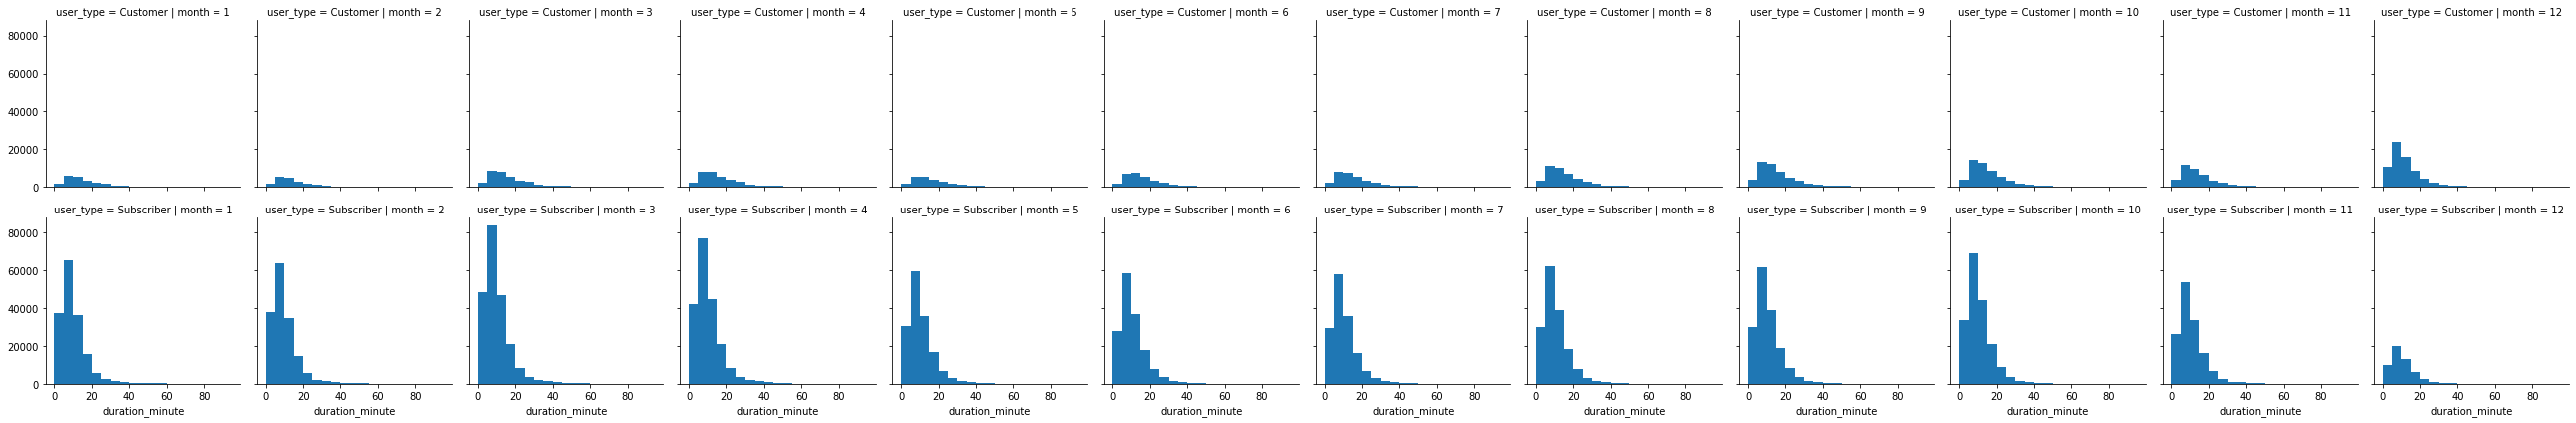

In [76]:
g=sb.FacetGrid(data=df,col='month',row='user_type')
g.map(plt.hist,'duration_minute',bins=np.arange(0,100,5))

the distribution is looks so normal and there isn't and weird situation and thats preety good because bay wheels won't face any surprises 

### the relation between mean of customer and subscriber in weekend and weekday

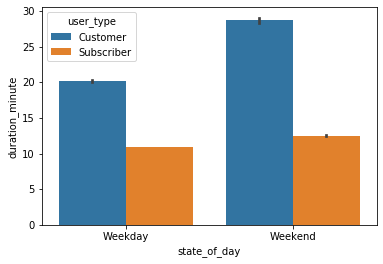

In [78]:
sb.barplot(data=df,x='state_of_day',y='duration_minute',hue='user_type',errwidth=0)

mean of duration of customer is bigger than that of suscriber ,
<br>
the mean of customer at weekend is bigger that of weekday
<br>
the mean of subscriber is the same during the week if it was at weekend or weekday 

## sourses
- https://stackoverflow.com/
- https://pandas.pydata.org/pandas-docs/stable/
- python for data analysis book
- https://www.geeksforgeeks.org/
- https://seaborn.pydata.org/generated/seaborn.barplot.html
- https://www.makeareadme.com/